# Linear methods for regression

## Linear regression with statsmodels

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 05 Feb 2016   Prob (F-statistic):           4.83e-98
Time:                        15:55:41   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

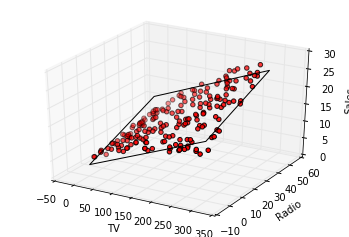

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
%matplotlib inline

# Fit Ordinary Least Squares: OLS
csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='Sales ~ TV + Radio', data = csv)
fit = model.fit()

print(fit.summary())

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'], c='r', marker='o')

xx, yy = np.meshgrid(
    np.linspace(csv['TV'].min(), csv['TV'].max(), num=10),
    np.linspace(csv['Radio'].min(), csv['Radio'].max(), num=10))


exog = pd.core.frame.DataFrame({'TV':xx.ravel(),'Radio':yy.ravel()})
out = fit.predict(exog=exog)
ax.plot_surface(xx, yy, out.reshape(xx.shape), color='None')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

## Linear regression with scikit-learn

Scikit learn offer many models for supervized learning, they all follow the same Application programming interface (API):

```
model = Estimator()
model.fit(X, y)
predictions = model.predict(X)
```

In [3]:
import sklearn.linear_model as lm
import sklearn.metrics as metrics

X = csv[['TV', 'Radio']]
y =  csv['Sales']

lr = lm.LinearRegression().fit(X, y)
y_pred = lr.predict(X)

print("R-squared=", metrics.r2_score(y, y_pred))

R-squared= 0.897194261083


## Overfitting

In statistics and machine learning, overfitting occurs when a statistical model describes random error or noise instead of the underlying relationship. Overfitting generally occurs when a model is **excessively complex**, such as having **too many parameters relative to the number of observations**. A model that has been overfit will generally have poor predictive performance, as it can exaggerate minor fluctuations in the data.

A learning algorithm is trained using some set of training samples. If the learning algorithm has the capacity to overfitt the training samples the performance on the **training sample set** will increases while the performance on unseen **test sample set** will decrease.

Situation when a learner has too many parameters relative to the number of observations.

- Complex learners with many parameters.

- High dimensions: large number of input feature. Linear predictor associate one parameter to each input feature. So high dimensional situation ($p$: number of features) with relatively small number of samples $n$ (so-called large $p$ small $n$ situation) generally lead to overfitting the training dataset. Thus it is generally a bad idea to add many input features into the learner. This phenomenon is called the **curse of dimensionality**.

So one of yhe most important criteria to choose a learning algorithm is based on the relative value of $p$ and $n$.

This phenomenon has many explanation:

- Remenber that the "covariance" matrix $X^TX$ used in linear model is a $p \times p$ matrix of rank $\min(n, p)$. Thus if $p > n$ the equation system is overparameterized and admit an infinity of solutions that might be specific to the learning dataset.

- The sampling density of $n$ samples in a $p$-dimensional space is proportional to $n^{1/p}. Thus high dimensional space are rapidelly very sparse, leading to poor estimation of samples densities.

- Another consequence of the sparse sampling in high dimensions is that all sample points are close to an edge of the sample. Consider N data points uniformly distributed in a p-dimensional unit ball centered at the origin. Suppose we consider a nearest-neighbor estimate at the origin. The median distance from the origin to the closest data point is given by the expression
$$
d(p, n) = (1 - \frac{1}{2}^n)^{1/p}
$$
A more complicated expression exists for the mean distance to the closest point. For N = 500, p = 10 , $d(p, N ) \approx 0.52$, more than halfway to the boundary. Hence most data points are closer to the boundary of the sample space than to any other data point. The reason that this presents a problem is that prediction is much more difficult near the edges of the training sample. One must extrapolate from neighboring sample points rather than interpolate between them.
(Source: T Ha.stie, R Tibshirani, J Friedman. *The Elements of Statistical Learning: Data Mining, Inference, and Prediction.* Second Edition, 2009)

- Structural risk minimization has provided a theoretical background of this phenomenom (see VC dimension).

- See also Bias–variance tradeoff

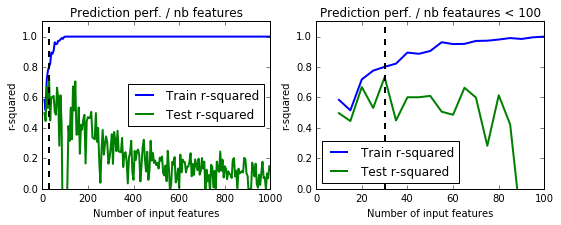

In [7]:
n_samples = 100
n_features_ = np.arange(10, 1000, 5)
r2_train, r2_test = list(), list()
for n_features in n_features_:
    # dataset
    n_features_info = int(n_features/10)
    print 
    X = np.random.randn(n_samples * 2, n_features)
    beta = np.zeros(n_features)
    beta[:n_features_info] = 1
    y = np.dot(X, beta) + np.random.randn(n_samples * 2)
    Xtrain, Xtest = X[:n_samples, :], X[n_samples:, :], 
    ytrain, ytest = y[:n_samples], y[n_samples:]
    # fit/predict
    lr = lm.LinearRegression().fit(Xtrain, ytrain)
    y_pred_train = lr.predict(Xtrain)
    y_pred_test = lr.predict(Xtest)
    r2_train.append(metrics.r2_score(ytrain, y_pred_train))
    r2_test.append(metrics.r2_score(ytest, y_pred_test))

argmax = n_features_[np.argmax(r2_test)]

plt.figure(figsize=(9, 3)) 
plt.subplot(121)
plt.plot(n_features_, r2_train, label="Train r-squared", linewidth=2)
plt.plot(n_features_, r2_test, label="Test r-squared", linewidth=2)
plt.axvline(x=argmax, linewidth=2, color='k', ls='--')
plt.ylim(0, 1.1)
plt.xlabel("Number of input features")
plt.ylabel("r-squared")
plt.legend(loc='center right')
plt.title("Prediction perf. / nb features")

plt.subplot(122)
plt.plot(n_features_, r2_train, label="Train r-squared", linewidth=2)
plt.plot(n_features_, r2_test, label="Test r-squared", linewidth=2)
plt.axvline(x=argmax, linewidth=2, color='k', ls='--')
plt.xlim(0, 100)
plt.ylim(0, 1.1)
plt.xlabel("Number of input features")
plt.ylabel("r-squared")
plt.legend(loc='lower left')
plt.title("Prediction perf. / nb feataures < 100")

### Exercice

Comment the graph above, in term of training and test performances